##**House Price Prediction**

In [42]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
import xgboost as xgb


In [43]:
# Load the California Housing dataset
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['PRICE'] = california.target

# Display the first few rows of the dataset
california_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRICE  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mea

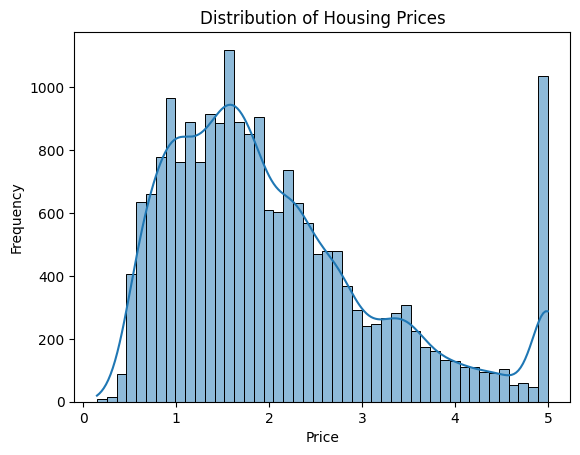

In [44]:
# Check for missing values
print(california_df.isnull().sum())

# Describe the dataset
print(california_df.describe())

# Visualize the distribution of the target variable (PRICE)
sns.histplot(california_df['PRICE'], kde=True)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [45]:
# Define features (X) and target variable (y)
X = california_df.drop(columns=['PRICE'])
y = california_df['PRICE']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [46]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


Mean Squared Error: 0.53
R-squared: 0.60


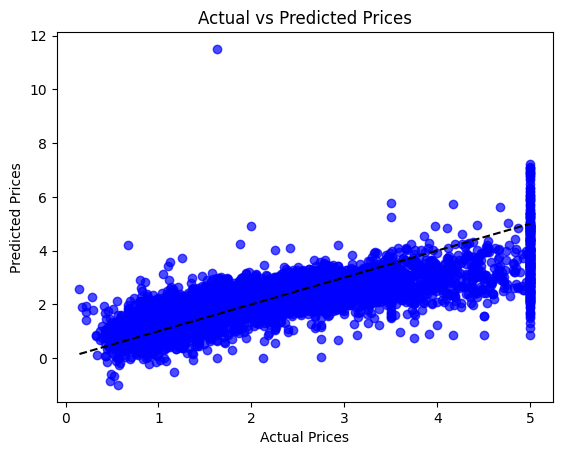

In [47]:
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Plot the actual vs predicted prices
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='k')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


In [49]:
# Define models and their parameters
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor()
}

params = {
    'LinearRegression': {},
    'DecisionTree': {
        'max_depth': [10, 20],
        'min_samples_split': [10, 20]
    },
    'RandomForest': {
        'n_estimators': [10, 20],
        'max_depth': [10, 20],
        'min_samples_split': [10, 20]
    },
    'GradientBoosting': {
        'n_estimators': [50, 100],
        'learning_rate': [0.1, 0.2],
        'max_depth': [3, 5]
    },
    'XGBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.1, 0.2],
        'max_depth': [3, 5]
    }
}

# Store the best model and its performance
best_model = None
best_score = float('-inf')
best_params = {}

# Iterate through each model and perform GridSearchCV
for model_name in models:
    model = models[model_name]
    param = params[model_name]

    # Perform GridSearchCV
    grid_search = GridSearchCV(model, param, cv=3, scoring='r2', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = grid_search.best_estimator_.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'{model_name} - Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}')
    print(f'Best Parameters: {grid_search.best_params_}')

    # Check if this model is the best
    if r2 > best_score:
        best_score = r2
        best_model = grid_search.best_estimator_
        best_model_name = model_name
        best_params = grid_search.best_params_

# Print the best model and its parameters
print(f'Best Model: {best_model}')
print(f'Best Parameters: {best_params}')
print(f'Best R-squared: {best_score:.2f}')


Fitting 3 folds for each of 1 candidates, totalling 3 fits
LinearRegression - Mean Squared Error: 0.53, R-squared: 0.60
Best Parameters: {}
Fitting 3 folds for each of 4 candidates, totalling 12 fits
DecisionTree - Mean Squared Error: 0.40, R-squared: 0.70
Best Parameters: {'max_depth': 10, 'min_samples_split': 20}
Fitting 3 folds for each of 8 candidates, totalling 24 fits
RandomForest - Mean Squared Error: 0.27, R-squared: 0.80
Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 20}
Fitting 3 folds for each of 8 candidates, totalling 24 fits
GradientBoosting - Mean Squared Error: 0.23, R-squared: 0.83
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Fitting 3 folds for each of 8 candidates, totalling 24 fits
XGBoost - Mean Squared Error: 0.22, R-squared: 0.83
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Best Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_byle

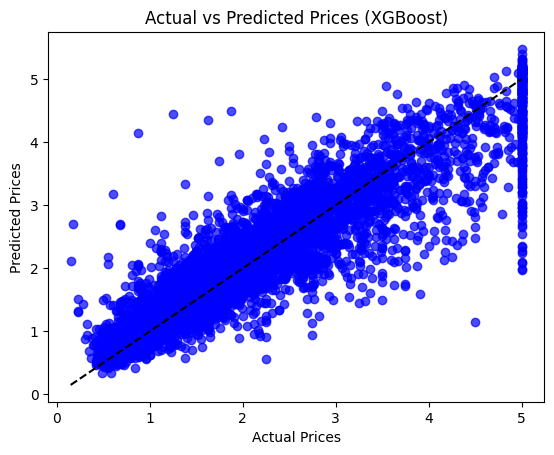

In [50]:
# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Plot the actual vs predicted prices
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='k')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title(f'Actual vs Predicted Prices ({best_model_name})')
plt.show()


In [52]:
# Export the best model
import joblib
joblib.dump(best_model, 'model_components/best_model.pkl')

['best_model.pkl']